In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
df = yf.download('BTC-USD')
df = df.dropna()

[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-08-21,59014.988281,61834.351562,58823.445312,61175.191406,61175.191406,32731154072
2024-08-22,61168.316406,61408.109375,59815.253906,60381.914062,60381.914062,27625734377
2024-08-23,60380.953125,64947.062500,60372.050781,64094.355469,64094.355469,42530509233


In [7]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358., 19723., 20089.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

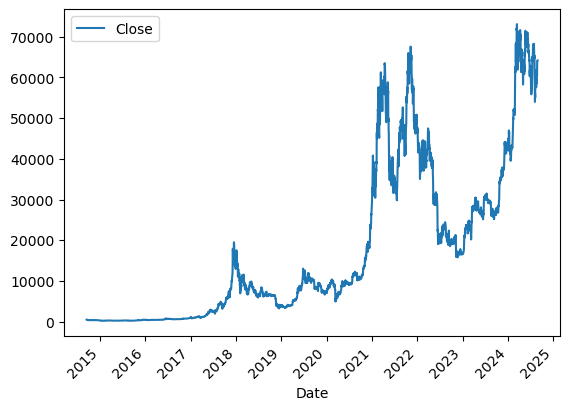

In [9]:
df.plot(y='Close')
plt.xticks(rotation=45)

In [10]:
model = RandomForestRegressor()

In [11]:
X = df[['Open', 'High', 'Low', 'Volume']]
X = X[:int(len(df)-1)]
y = df['Close']
y = y[:int(len(df)-1)]
model.fit(X, y)

RandomForestRegressor()

In [13]:
predictions = model.predict(X)
print('The model score is:', model.score(X, y))

The model score is: 0.9999227217406643


In [15]:
new_data = df[['Open', 'High', 'Low', 'Volume']].tail(1)
prediction = model.predict(new_data)
print('The model predicts the last row or day to be:', prediction)
print('Actual value is:', df[['Close']].tail(1).values[0][0])

The model predicts the last row or day to be: [63771.22554688]
Actual value is: 64174.76953125
